In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!nvidia-smi

Thu Apr 13 15:13:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 99.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 95.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.0.1+cu118
    Uninstalling torchaudio-2.0.1+cu118:
      Successfully uninstalled torchaudio-2.0.1+cu118
ERROR: pip's dependency resolver does not current

In [4]:
import torch
torch.__version__

'1.7.1+cu110'

In [5]:
! [ -e /content ] && pip install -Uqq fastai 

In [6]:
import fastai
fastai.__version__

'2.7.12'

In [9]:
from fastai.vision.all import *
from fastai import *
from fastai.vision import *

In [8]:
import os

In [10]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!mdkir ~/.kaggle

/bin/bash: mdkir: command not found


In [12]:
!cp kaggle.json ~/.kaggle/

cp: cannot create regular file '/root/.kaggle/': Not a directory


In [13]:
! chmod 600 ~/.kaggle/kaggle.js

chmod: cannot access '/root/.kaggle/kaggle.js': No such file or directory


In [15]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [16]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [00:29<00:00, 119MB/s]
100% 2.70G/2.70G [00:29<00:00, 97.8MB/s]


In [17]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [18]:
path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

In [21]:
tmfs_for_item = RandomResizedCrop(128, min_scale=0.35)
tmfs_for_batch = [Normalize.from_stats(*imagenet_stats)]

data = ImageDataLoaders.from_folder(path, item_tmfs = tmfs_for_item,
batch_tmfs=tmfs_for_batch,
valid_pct=0.15, shuffle=True,
device=torch.device('cuda'))

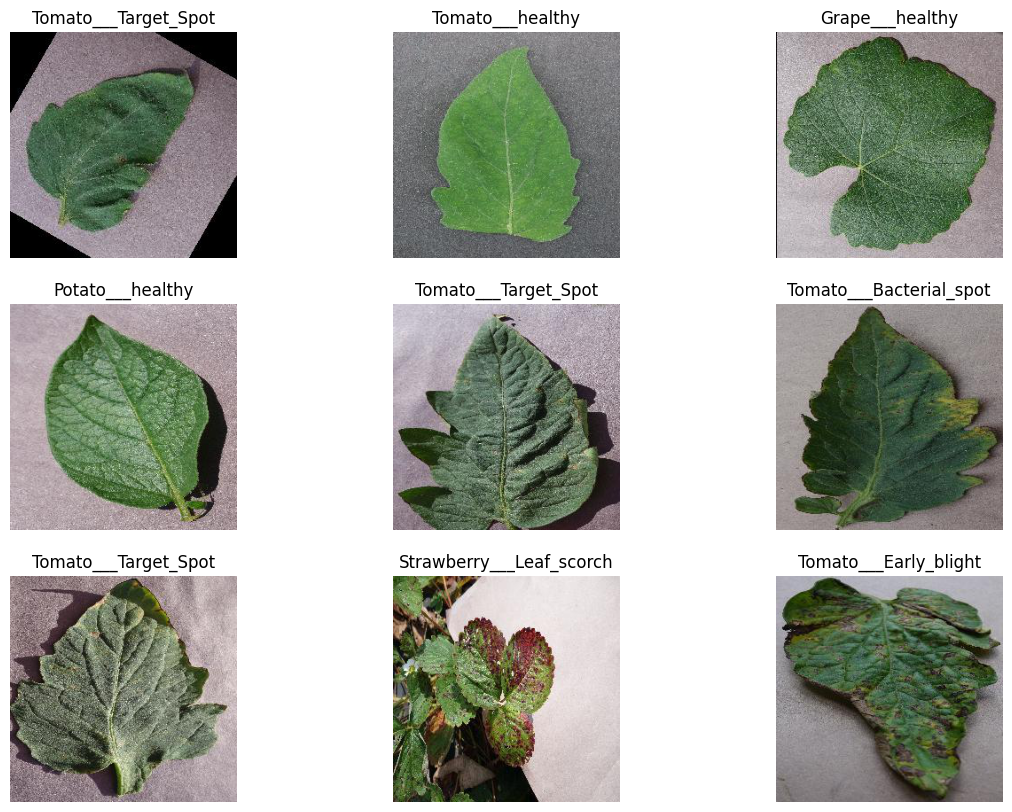

In [22]:
data.show_batch(figsize=(14,10))

In [23]:
#Creating a model
learn = cnn_learner(data, resnet34, metrics=[error_rate,accuracy])

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [24]:
#Showing the model summary 
learn.summary()

Sequential (Input shape: 64 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 128 x 128 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

SuggestedLRs(valley=0.0012022644514217973)

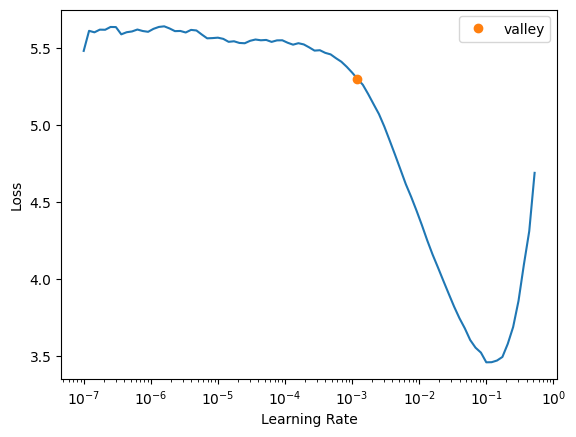

In [25]:
#Choosing the optimal learning rate
#The optimal learning rate is 0.0012022644514217973
learn.lr_find()

In [28]:
#We are now going to fine tune the resnet34 model on our training data
#We have achieved an incredible accuracy of 99.82%
learn.fine_tune(5, 0.0012)

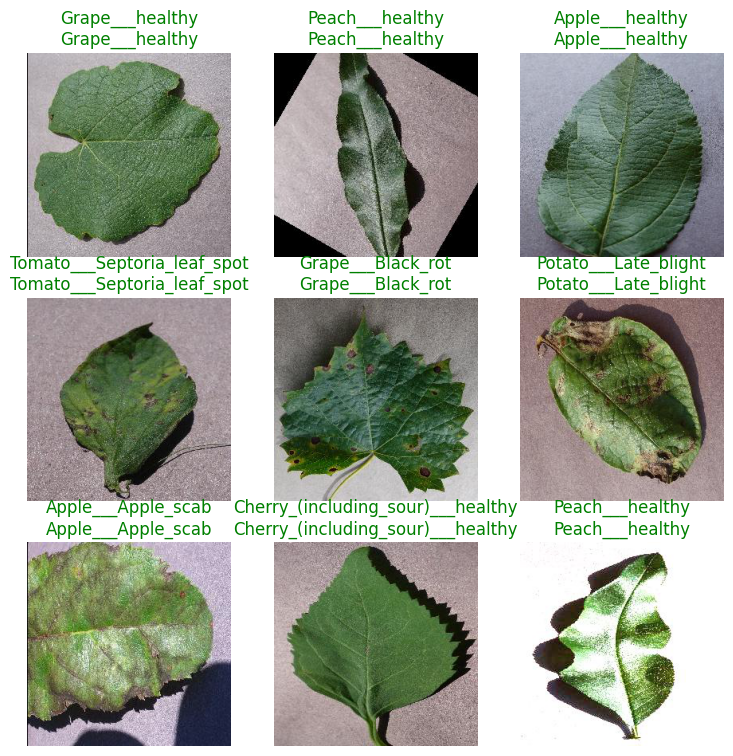

In [29]:
learn.show_results()

In [30]:
interp = Interpretation.from_learner(learn)

In [31]:
interp2=ClassificationInterpretation.from_learner(learn)

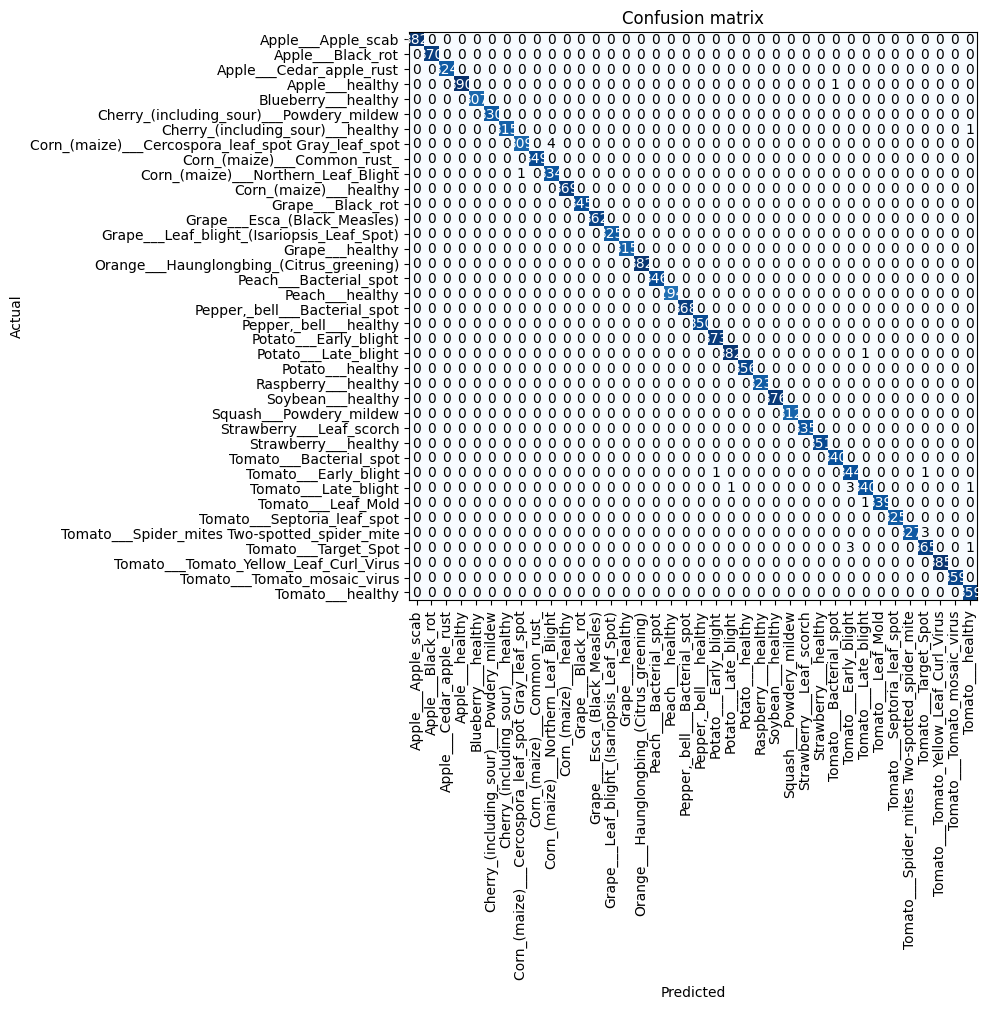

In [32]:
#Generally, our model is very accurate. The maximum number of confused cases is 3. the model confused tomato_early_blight
#with tomato_late_blight and tomato_target_spot
interp2.plot_confusion_matrix(figsize=(15,10))

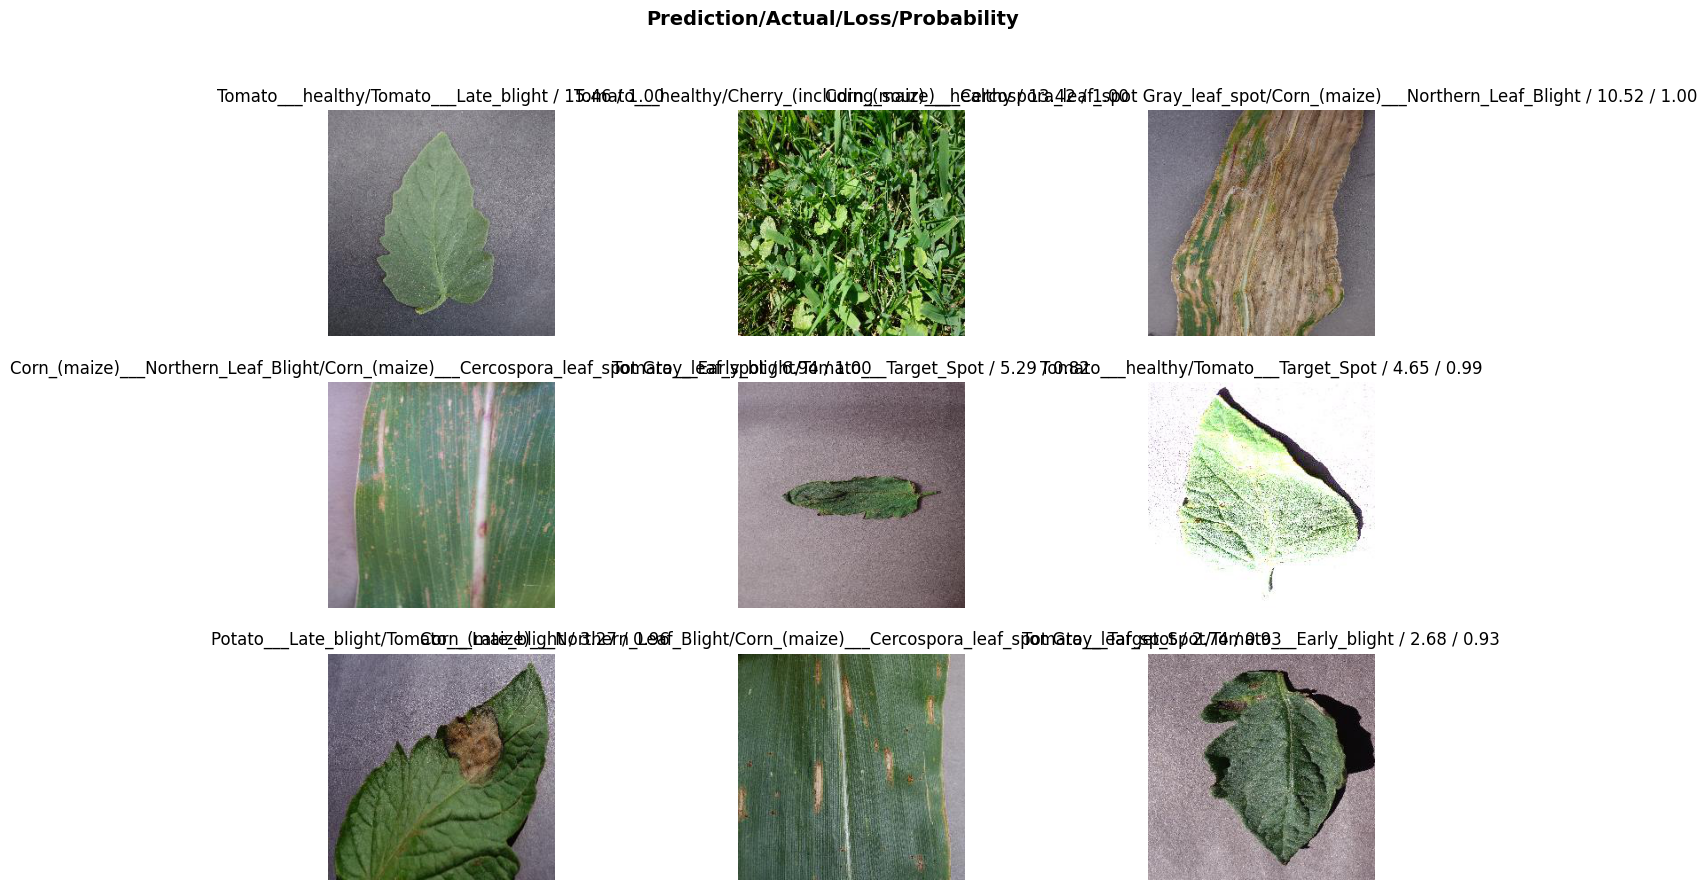

In [33]:
#Showing the biggest losses
interp.plot_top_losses(9, figsize=(15,10))

In [34]:
#Saving the model
learn.save('my_model')

Path('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/models/my_model.pth')